In [ ]:
# This is for testing MTF quality by 
# 1. taking a cut through the middle
# 2. integrating portions of the MTF

# created 2019 June 23 by E.S.

In [43]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os
import gc
from astropy.io import fits
import pandas as pd
import glob
from mpl_toolkits.axes_grid1 import host_subplot
from collections import OrderedDict
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

# Read in MTF FITS file, then write data to csv

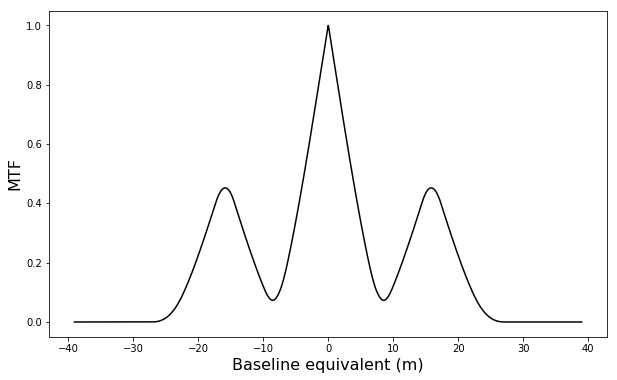

In [69]:
# read in image
sciImg, header = fits.getdata("perfect_mtf.fits",0,header=True)
    
# take strip 5 pixels tall (i.e., long in y) in the middle
y_side_length = np.shape(sciImg)[0]

# examine strips across the MTF center
strip = sciImg[int(0.5*y_side_length)-2:int(0.5*y_side_length)+3,:]
med_strip = np.median(strip, axis = 0)
max_strip = np.max(strip, axis = 0)

# integrate the whole MTF in y (so that we can do a fuller integration later,
# but still have data columns of the right length to write)

y_integ = np.sum(sciImg, axis = 0)

# put data into dictionary
d = {"x_pix": np.arange(np.shape(sciImg)[1]),
     "med_strip": med_strip,
     "max_strip": max_strip, 
     "y_integ": y_integ}

# convert to df
mtf_data = pd.DataFrame(data = d)

# write to file
mtf_data.to_csv("test.csv")

#print(mtf_data)

freq_x_axis_preshift_example = np.fft.fftfreq(len(med_strip))
freq_x_axis_example = np.fft.fftshift(freq_x_axis_preshift_example)
freq_x_axis_invmas_example = np.divide(freq_x_axis_example,10.7)
# converted into aperture baselines in m
lambda_m = 4.05E-6
masec_per_rad = 360.*3600*1000/(2*np.pi)
baseline_x_axis_m_example = np.multiply(lambda_m*masec_per_rad,freq_x_axis_invmas_example) 

plt.figure(figsize=(10,6))
plt.plot(baseline_x_axis_m_example,np.divide(med_strip,np.max(med_strip)), color="k")
plt.xlabel("Baseline equivalent (m)", fontsize=16)
plt.ylabel("MTF", fontsize=16)
#plt.axvline(x=0.5*len(med_strip),color="k")
#plt.ylim([0,4e12])
#plt.show()

# write out pngs
#plt.plot(sciImg)
plt.savefig("junk.pdf", overwrite = True)
#plt.close()

In [2]:
# significant distances at 140 pc
def au_2_freq(n_au):
    l = 140./(n_au*1000)
    return l

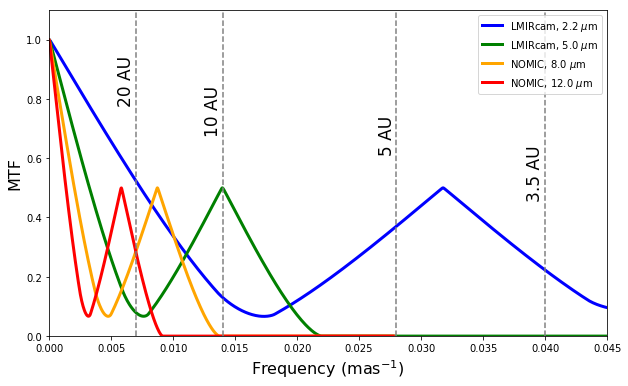

In [29]:
# read in images
sciImg_nomic_12pt0um, header = fits.getdata("nomic_12pt0um.fits",0,header=True)
sciImg_nomic_12pt0um = sciImg_nomic_12pt0um[1,:,:] # take MTF slice
sciImg_nomic_8pt0um, header = fits.getdata("nomic_8pt0um.fits",0,header=True)
sciImg_nomic_8pt0um = sciImg_nomic_8pt0um[1,:,:] # take MTF slice
sciImg_lmir_2pt2um, header = fits.getdata("lmir_2pt2um.fits",0,header=True)
sciImg_lmir_2pt2um = sciImg_lmir_2pt2um[1,:,:] # take MTF slice
sciImg_lmir_5pt0um, header = fits.getdata("lmir_5pt0um.fits",0,header=True)
sciImg_lmir_5pt0um = sciImg_lmir_5pt0um[1,:,:] # take MTF slice
    
# take strip 5 pixels tall (i.e., long in y) in the middle
y_side_length = np.shape(sciImg_lmir_2pt2um)[0]

# examine strips across the MTF center
strip_nomic_12pt0um = sciImg_nomic_12pt0um[int(0.5*y_side_length)-2:int(0.5*y_side_length)+3,:]
med_strip_nomic_12pt0um = np.median(strip_nomic_12pt0um, axis = 0)
max_strip_nomic_12pt0um = np.max(strip_nomic_12pt0um, axis = 0)

strip_nomic_8pt0um = sciImg_nomic_8pt0um[int(0.5*y_side_length)-2:int(0.5*y_side_length)+3,:]
med_strip_nomic_8pt0um = np.median(strip_nomic_8pt0um, axis = 0)
max_strip_nomic_8pt0um = np.max(strip_nomic_8pt0um, axis = 0)

strip_lmir_2pt2um = sciImg_lmir_2pt2um[int(0.5*y_side_length)-2:int(0.5*y_side_length)+3,:]
med_strip_lmir_2pt2um = np.median(strip_lmir_2pt2um, axis = 0)
max_strip_lmir_2pt2um = np.max(strip_lmir_2pt2um, axis = 0)

strip_lmir_5pt0um = sciImg_lmir_5pt0um[int(0.5*y_side_length)-2:int(0.5*y_side_length)+3,:]
med_strip_lmir_5pt0um = np.median(strip_lmir_5pt0um, axis = 0)
max_strip_lmir_5pt0um = np.max(strip_lmir_5pt0um, axis = 0)

# integrate the whole MTF in y (so that we can do a fuller integration later,
# but still have data columns of the right length to write)

'''
y_integ = np.sum(sciImg, axis = 0)

# put data into dictionary
d = {"x_pix": np.arange(np.shape(sciImg)[1]),
     "med_strip": med_strip,
     "max_strip": max_strip, 
     "y_integ": y_integ}

# convert to df
mtf_data = pd.DataFrame(data = d)

# write to file
mtf_data.to_csv("test.csv")

#print(mtf_data)
'''
freq_x_axis_preshift_example = np.fft.fftfreq(len(med_strip))
freq_x_axis_example = np.fft.fftshift(freq_x_axis_preshift_example)
freq_x_axis_invmas_example_lmir = np.divide(freq_x_axis_example,10.7)
freq_x_axis_invmas_example_nomic = np.divide(freq_x_axis_example,18.)

plt.figure(figsize=(10,6))
plt.plot(freq_x_axis_invmas_example_lmir,
         np.divide(med_strip_lmir_2pt2um,np.max(med_strip_lmir_2pt2um)), color="b", linewidth=3, label="LMIRcam, 2.2 $\mu$m")
plt.plot(freq_x_axis_invmas_example_lmir,
         np.divide(med_strip_lmir_5pt0um,np.max(med_strip_lmir_5pt0um)), color="g", linewidth=3, label="LMIRcam, 5.0 $\mu$m")
plt.plot(freq_x_axis_invmas_example_nomic,
         np.divide(med_strip_nomic_8pt0um,np.max(med_strip_nomic_8pt0um)), color="orange", linewidth=3, label="NOMIC, 8.0 $\mu$m")
plt.plot(freq_x_axis_invmas_example_nomic,
         np.divide(med_strip_nomic_12pt0um,np.max(med_strip_nomic_12pt0um)), color="r", linewidth=3, label="NOMIC, 12.0 $\mu$m")
plt.xlabel("Frequency (mas$^{-1}$)", fontsize=16)
plt.ylabel("MTF", fontsize=16)

# power at 20 AU
plt.axvline(x=au_2_freq(20), linestyle="--", color="gray")
plt.annotate("20 AU", (au_2_freq(20)-0.0015,0.9), rotation=90, fontsize=17)
# power at 10 AU
plt.axvline(x=au_2_freq(10), linestyle="--", color="gray")
plt.annotate("10 AU", (au_2_freq(10)-0.0015,0.8), rotation=90, fontsize=17)
# power at 5 AU
plt.axvline(x=au_2_freq(5), linestyle="--", color="gray")
plt.annotate("5 AU", (au_2_freq(5)-0.0015,0.7), rotation=90, fontsize=17)
# power at 2 AU
plt.axvline(x=au_2_freq(3.5), linestyle="--", color="gray")
plt.annotate("3.5 AU", (au_2_freq(3.5)-0.0015,0.6), rotation=90, fontsize=17)

plt.xlim([0,0.045])
plt.ylim([0,1.1])

plt.legend(loc="upper right")

# write out pngs
#plt.plot(sciImg)
plt.savefig("junk.pdf", overwrite = True)
#plt.close()

# Read in csvs of MTF data and plot them

In [4]:
# set x-axes
freq_x_axis_preshift = np.fft.fftfreq(360) # frequency axes (in pix^-1)
freq_x_axis = np.fft.fftshift(freq_x_axis_preshift)
# convert to mas^-1
freq_x_axis_invmas = np.divide(freq_x_axis,10.7)
# converted into aperture baselines in m
lambda_m = 4.05E-6
masec_per_rad = 360.*3600*1000/(2*np.pi)
baseline_x_axis_m = np.multiply(lambda_m*masec_per_rad,freq_x_axis_invmas) 

# also make it into a function, for making tick marks
def invmas_2_m(x_axis_invmas):
    axis_m = np.multiply(lambda_m*masec_per_rad,x_axis_invmas)
    return axis_m
def m_2_invmas(x_axis_m):
    axis_m = np.divide(x_axis_m,lambda_m)*np.divide(1.,masec_per_rad)
    return axis_m

<Figure size 432x288 with 0 Axes>

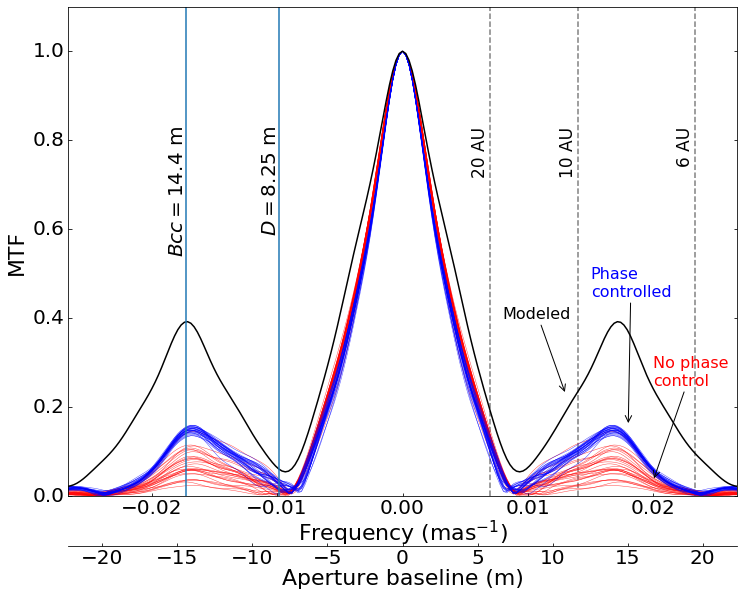

In [44]:
# read in some test files

# non-phase-controlled PSFs
file_list_non_phase = glob.glob("data/mtf_data_non_phase*csv")

# phase-controlled PSFs
file_list_phase = glob.glob("data/mtf_data_phase*csv")

N = 29 # number of MTFs to plot (this just keeps the number of phase- and non-phase-controlled MTFs the same number)

plt.clf()

fig = plt.figure(figsize=(12,10))
host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(bottom=0.2)

par2 = host.twiny()

offset = -50
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["bottom"] = new_fixed_axis(loc="bottom",
                                     axes=par2,
                                     offset=(0, offset))
par2.axis["top"].toggle(all=False)

host.set_ylabel("MTF")
host.set_xlabel("Frequency (mas$^{-1}$)")
par2.set_xlabel("Aperture baseline (m)")

# significant baselines
par2.axvline(x=-14.4) # Bcc
par2.annotate("$Bcc=14.4$ m", (-14.4-1.2,0.8), rotation=90, fontsize=20)
par2.axvline(x=-8.25) # 1 mirror
par2.annotate("$D=8.25$ m", (-8.25-1.2,0.8), rotation=90, fontsize=20)

# power at 20 AU
host.axvline(x=au_2_freq(20), linestyle="--", color="gray")
host.annotate("20 AU", (au_2_freq(20)-0.0015,0.8), rotation=90, fontsize=17)
# power at 10 AU
host.axvline(x=au_2_freq(10), linestyle="--", color="gray")
host.annotate("10 AU", (au_2_freq(10)-0.0015,0.8), rotation=90, fontsize=17)
# power at 5 AU
host.axvline(x=au_2_freq(6), linestyle="--", color="gray")
host.annotate("6 AU", (au_2_freq(6)-0.0015,0.8), rotation=90, fontsize=17)

for i in range(0,N):
    
    mtf_example = pd.read_csv(file_list_non_phase[i])
    p1, = host.plot(freq_x_axis_invmas,
             np.divide(mtf_example["med_strip"],np.max(mtf_example["med_strip"])), 
                    color="r", linewidth=0.5, alpha=0.7, label="Non-phase-controlled")

for i in range(0,N):
    
    mtf_example = pd.read_csv(file_list_phase[i])
    p1, = host.plot(freq_x_axis_invmas,
             np.divide(mtf_example["med_strip"],np.max(mtf_example["med_strip"])), 
                    color="b", linewidth=0.5, alpha=0.7, label="Phase-controlled")

# the perfect MTF
mtf_br_alpha_perfect = pd.read_csv("data/mtf_data_simulated_br_alpha.csv")
p1, = host.plot(freq_x_axis_invmas,
         np.divide(mtf_br_alpha_perfect["med_strip"],np.max(mtf_br_alpha_perfect["med_strip"])), 
                color="k", label="Modeled")

# dummy plot to put the baseline in m in
p3, = par2.plot(baseline_x_axis_m, -10*np.ones(len(baseline_x_axis_m)), label="Aperture baseline (m)", color="k")

host.set_xlim(m_2_invmas(-22.3),m_2_invmas(22.3))
par2.set_xlim(-22.3,22.3)
par2.set_ylim(0, 1.1)

host.axis["bottom"].label.set_color(p1.get_color())
par2.axis["bottom"].label.set_color(p3.get_color())

params = {'axes.labelsize': 22,
          'axes.titlesize':20, 
          'legend.fontsize': 20, 
          'xtick.labelsize': 20, 
          'ytick.labelsize': 20}

matplotlib.rcParams.update(params)

plt.annotate("Modeled", xy=(0.013,0.23), xytext=(0.008,0.4), fontsize=16, color="k",
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
plt.annotate("Phase\ncontrolled", xy=(0.018,0.16), xytext=(0.015,0.45), fontsize=16, color="b",
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
plt.annotate("No phase\ncontrol", xy=(0.02,0.036), xytext=(0.02,0.25), fontsize=16, color="r",
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

plt.savefig("test.pdf")

# Read in FITS files and make 2D comparisons

In [2]:
# phase- and non-phase-controlled FITS
file_fits_amp_phasectrl = glob.glob("data/empirical_fft_fits/fft_amp_phase_controlled*fits")
file_fits_amp_nonphasectrl = glob.glob("data/empirical_fft_fits/fft_amp_non_phase_controlled*fits")
# the simulated Br-alpha 
amp_simulated, header = fits.getdata("data/simulated_psfs/fft_amp_simulated_br_alpha_000002.fits",0,header=True)

/Users/nyumbani/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


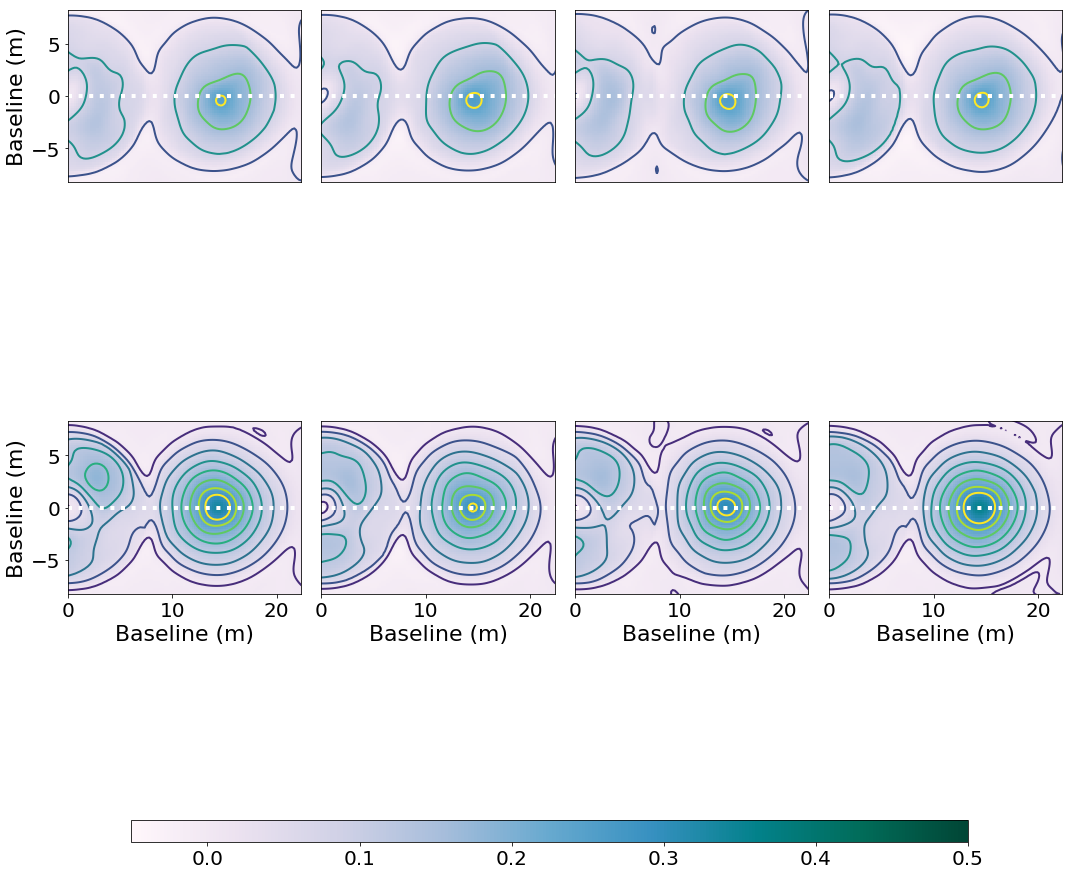

In [78]:
fig, axs = plt.subplots(2,4)
fig.set_figheight(15)
fig.set_figwidth(15)

X_1d = np.linspace(start=baseline_x_axis_m[0], stop=baseline_x_axis_m[-1], num=np.shape(amp_simulated)[0])
Y_1d = np.copy(X_1d)
X, Y = np.meshgrid(X_1d, Y_1d)

# normalize the simulated MTF
amp_simulated = np.divide(amp_simulated,np.max(amp_simulated))

for i in range(0,4):
    
    ## phase-controlled PSFs
    amp_empirical_phase, header = fits.getdata(file_fits_amp_phasectrl[4*i],0,header=True)
     
    # normalize
    if (i == 0):
        norm_const = np.max(amp_empirical_phase)
    amp_empirical_phase = np.divide(amp_empirical_phase,norm_const)

    imshow = axs[0,i].imshow(np.subtract(amp_simulated,amp_empirical_phase), cmap="PuBuGn", origin="lower", 
                    vmin=-0.05, vmax=0.5,
                    extent=[baseline_x_axis_m[0], baseline_x_axis_m[-1], baseline_x_axis_m[0], baseline_x_axis_m[-1]])
    CS = axs[0,i].contour(X_1d,Y_1d,np.subtract(amp_simulated,amp_empirical_phase),levels=0.08*np.arange(-1,4), linewidths=2)
    #axs[0,i].clabel(CS, inline=1, fontsize=10)
    axs[0,i].axhline(y=0, linestyle=":", linewidth=4, color="w")
    axs[0,i].set_xlim(0,22.3)
    axs[0,i].set_ylim(-8.25,8.25)
    
    axs[0,i].axes.get_xaxis().set_visible(False)
    axs[0,i].axes.get_yaxis().set_visible(False)
    if (i==0):
        axs[0,i].axes.get_yaxis().set_visible(True)
        axs[0,i].set_ylabel("Baseline (m)")

    
    ## non-phase-controlled PSFs
    amp_empirical_nonphase, header = fits.getdata(file_fits_amp_nonphasectrl[4*i],0,header=True)

    # normalize
    amp_empirical_nonphase = np.divide(amp_empirical_nonphase,norm_const)
    
    axs[1,i].imshow(np.subtract(amp_simulated,amp_empirical_nonphase), cmap="PuBuGn", origin="lower", 
                    vmin=-0.05, vmax=0.5,
                    extent=[baseline_x_axis_m[0], baseline_x_axis_m[-1], baseline_x_axis_m[0], baseline_x_axis_m[-1]])
    CS = axs[1,i].contour(X_1d,Y_1d,np.subtract(amp_simulated,amp_empirical_nonphase),levels=0.04*np.arange(-1,8), linewidths=2)
    #axs[1,i].clabel(CS, inline=1, fontsize=10)
    axs[1,i].axhline(y=0, linestyle=":", linewidth=4, color="w")
    axs[1,i].set_xlim(0,22.3)
    axs[1,i].set_ylim(-8.25,8.25)
    axs[1,i].axes.get_yaxis().set_visible(False)
    if (i==0):
        axs[1,i].axes.get_yaxis().set_visible(True)
        axs[1,i].set_ylabel("Baseline (m)")
    axs[1,i].set_xlabel("Baseline (m)")

params = {'axes.labelsize': 22,
          'axes.titlesize': 20, 
          'legend.fontsize': 20, 
          'xtick.labelsize': 20, 
          'ytick.labelsize': 20}

matplotlib.rcParams.update(params)
    
plt.subplots_adjust(wspace=0, hspace=0)
    
p0 = axs[1,0].get_position().get_points().flatten()
p1 = axs[1,-1].get_position().get_points().flatten()
ax_cbar = fig.add_axes([p0[0], 0, 3.2*p1[1], 0.02])
plt.colorbar(imshow, cax=ax_cbar, orientation='horizontal')
plt.tight_layout()
    
#plt.savefig("contour_mtfs_bbox.pdf", bbox_inches='tight')
plt.savefig("contour_mtfs.pdf")

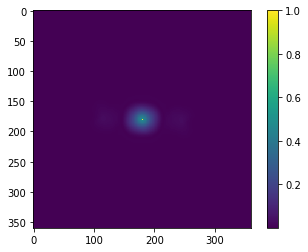

In [15]:
plt.imshow(amp_empirical_nonphase)
plt.colorbar()
plt.show()

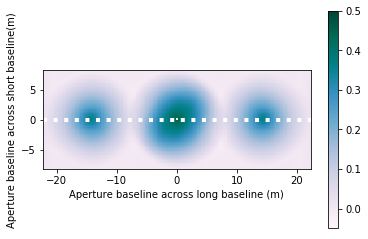

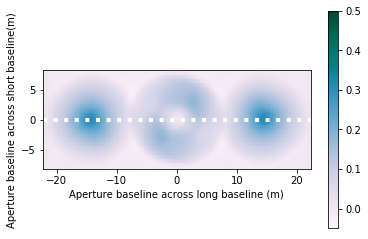

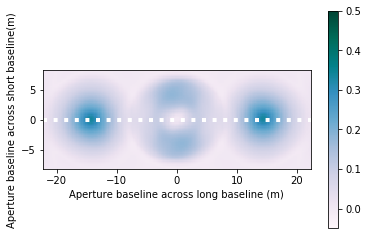

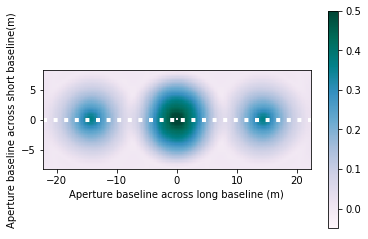

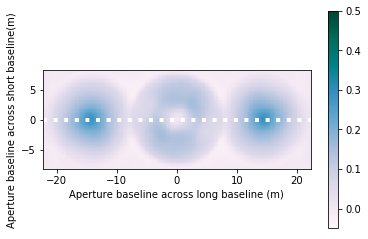

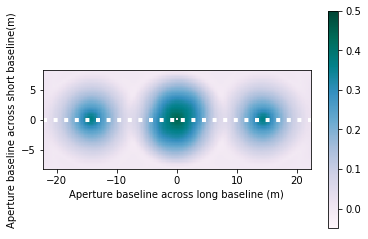

In [16]:
# non-phase-controlled PSFs

for i in range(0,6):
    amp_empirical, header = fits.getdata(file_fits_amp_nonphasectrl[i],0,header=True)
    
    # normalize them
    amp_empirical = np.divide(amp_empirical,np.max(amp_empirical))
    amp_simulated = np.divide(amp_simulated,np.max(amp_simulated))
    
    plt.imshow(np.subtract(amp_simulated,amp_empirical), cmap="PuBuGn", origin="lower", 
               extent=[baseline_x_axis_m[0], baseline_x_axis_m[-1], baseline_x_axis_m[0], baseline_x_axis_m[-1]], 
               vmin=-0.05, vmax=0.5)
    plt.xlim(-22.3,22.3)
    plt.ylim(-8.25,8.25)
    
    plt.axhline(y=0, linestyle=":", linewidth=4, color="w")
    
    plt.xlabel("Aperture baseline across long baseline (m)")
    plt.ylabel("Aperture baseline across short baseline(m)")
    plt.colorbar()
    plt.show()